<a href="https://colab.research.google.com/github/Reyhaneh2001/DL_Course_ConvTasks/blob/main/Conv2D_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow.keras.datasets.cifar10 as cifar10
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def load_cifar10():
    (x_train, _), (_, _) = cifar10.load_data()
    x_train = x_train[:10].astype('float32') / 255.0
    return x_train

In [ ]:
def apply_filters(images, filters):
    filtered_images = []
    for f in filters:
        f = np.expand_dims(f, axis=-1)
        f = np.repeat(f, 3, axis=-1)
        f = np.expand_dims(f, axis=-1)
        conv_layer = tf.keras.layers.Conv2D(1, (3, 3), padding='same', use_bias=False,
                                            kernel_initializer=tf.constant_initializer(f))
        img_filtered = conv_layer(tf.convert_to_tensor(images))
        img_filtered = np.squeeze(img_filtered.numpy())
        filtered_images.append(img_filtered)
    return filtered_images

In [ ]:
def plot_images(original, filtered):
    fig, axes = plt.subplots(len(original), 3, figsize=(10, 20))
    for i in range(len(original)):
        axes[i, 0].imshow(original[i])
        axes[i, 0].set_title("Original")
        axes[i, 1].imshow(filtered[0][i], cmap='gray')
        axes[i, 1].set_title("Filter 1")
        axes[i, 2].imshow(filtered[1][i], cmap='gray')
        axes[i, 2].set_title("Filter 2")

        for ax in axes[i]:
            ax.axis('off')
    plt.tight_layout()
    plt.show()



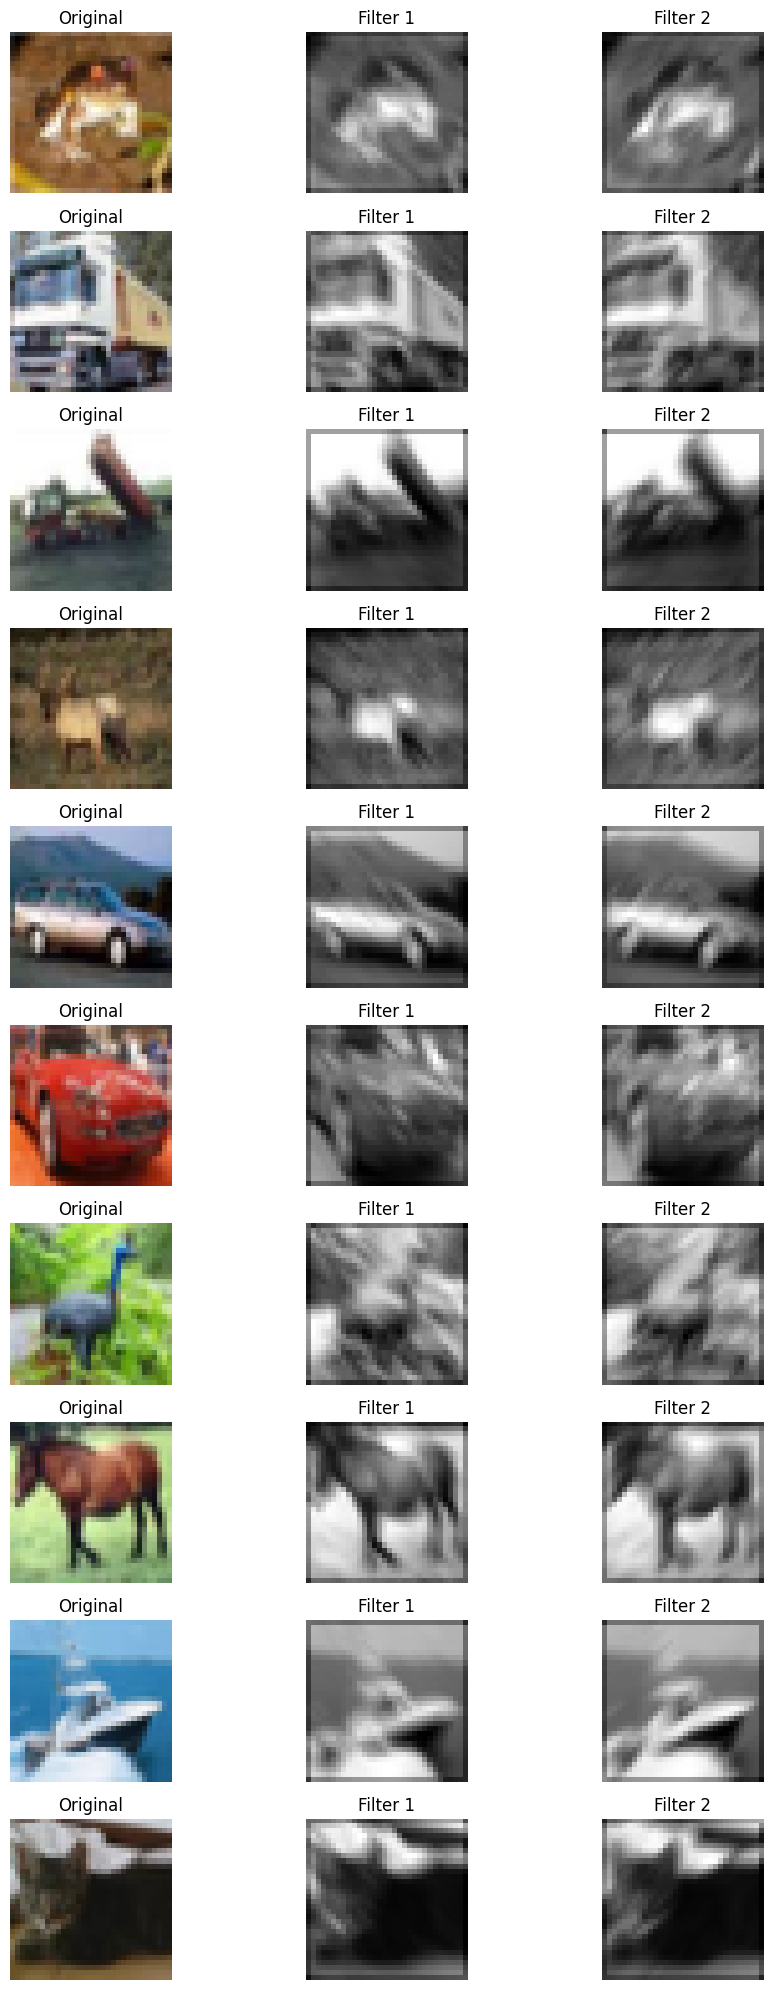

In [ ]:
images = load_cifar10()

filter1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]], dtype=np.float32)
filter2 = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0]], dtype=np.float32)
filters = [filter1, filter2]

filtered_images = apply_filters(images, filters)

plot_images(images, filtered_images)
